In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
with open("./results/apple.json", "r") as f:
    apple_results = json.load(f)

with open("./results/heart.json", "r") as f:
    heart_results = json.load(f)

In [3]:
marker = {
    "PC": "o",
    "A*": "*",
    "MIIC": "s",
    "HC": "^",
    "MMHC": "p",
    "TS": "X",
    "K2": "8",
    "CL": "2",
    "NB": "2",
    "TAN": "2",
}

In [4]:
def showAsDataFrame(results):
    data = pd.DataFrame(columns=["algorithm", "category", "library", "notes", "accuracy", "f1_macro", "precision_macro", "recall_macro"])
    
    for category in results:
        for algorithm in results[category]:
            for result in results[category][algorithm]:
                data.loc[len(data)] = [
                    algorithm, category, result["library"], result["notes"], 
                    result["metrics"]["accuracy"], result["metrics"]["f1_macro"], result["metrics"]["precision_macro"], result["metrics"]["recall_macro"]
                ]
    
    data.sort_values(by=["accuracy", "f1_macro"], ascending=False, inplace=True)
    return data

In [5]:
def getBestAlgorithmResult(results):
    best_result = results[0]

    for result in results[1:]:
        if result["metrics"]["accuracy"] > best_result["metrics"]["accuracy"]: best_result = result

    return best_result

In [6]:
def plotAccuracy(results, title, groupby_algo=False):
    def _registerResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        data.loc[len(data)] = [label, result["metrics"]["accuracy"]]

    data = pd.DataFrame(columns=["algorithm", "accuracy"])

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _registerResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _registerResult(algorithm, result, groupby_algo)
    
    data.sort_values(by="accuracy", ascending=False, inplace=True)
    sns.barplot(data, y="algorithm", x="accuracy")
    plt.title(title)
    plt.xlabel("Accuracy")
    plt.ylabel("Algorithm")

In [7]:
def plotAccuracyEdgesScatter(results, title, groupby_algo=False):
    def _plotResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        plt.scatter(x=result["num_edges"], y=result["metrics"]["accuracy"], label=label, marker=marker[algorithm])
        if groupped: plt.annotate(label, (result["num_edges"], result["metrics"]["accuracy"]))

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _plotResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _plotResult(algorithm, result, groupby_algo)

    plt.title(title)
    plt.xlabel("Number of edges")
    plt.ylabel("Accuracy")
    if not groupby_algo:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

In [8]:
def plotAccuracyTimeScatter(results, title, groupby_algo=False, log_scale=False):
    def _plotResult(algorithm, result, groupped=False):
        if groupped: 
            label = f"{algorithm}"
        else: 
            notes = "" if result['notes'] is None else f"({result['notes']})"
            label = f"{algorithm} {notes} ({result['library']})"
        plt.scatter(x=result["time"]/1e6, y=result["metrics"]["accuracy"], label=label, marker=marker[algorithm])
        if groupped: plt.annotate(label, (result["time"]/1e6, result["metrics"]["accuracy"]))

    for category in results:
        for algorithm in results[category]:
            if groupby_algo:
                _plotResult(algorithm, getBestAlgorithmResult(results[category][algorithm]), groupby_algo)
            else:
                for result in results[category][algorithm]:
                    _plotResult(algorithm, result, groupby_algo)

    plt.title(title)
    plt.xlabel("CPU time (ms)")
    plt.ylabel("Accuracy")
    if log_scale: plt.xscale("log")
    if not groupby_algo:
        plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Apple quality
---

## Accuracy

Score-based methods achieve the best results.

,algorithm,category,library,notes,accuracy,f1_macro,precision_macro,recall_macro
7,HC,score,pgmpy,K2,0.817,0.816991,0.817303,0.817152
12,HC,score,pyAgrum,None,0.813,0.812796,0.815201,0.813411
13,TS,score,pyAgrum,None,0.806,0.806000,0.806081,0.806081
11,HC,score,pgmpy,AIC,0.802,0.801961,0.802627,0.802220
8,HC,score,pgmpy,BDEU,0.802,0.801743,0.804457,0.802440
9,HC,score,pgmpy,BDS,0.802,0.801743,0.804457,0.802440
10,HC,score,pgmpy,BIC,0.802,0.801743,0.804457,0.802440
20,MMHC,hybrid,pgmpy,K2,0.792,0.791597,0.795326,0.792519
21,MMHC,hybrid,pgmpy,BDEU,0.792,0.791597,0.795326,0.792519
22,MMHC,hybrid,pgmpy,BDS,0.792,0.791597,0.795326,0.792519


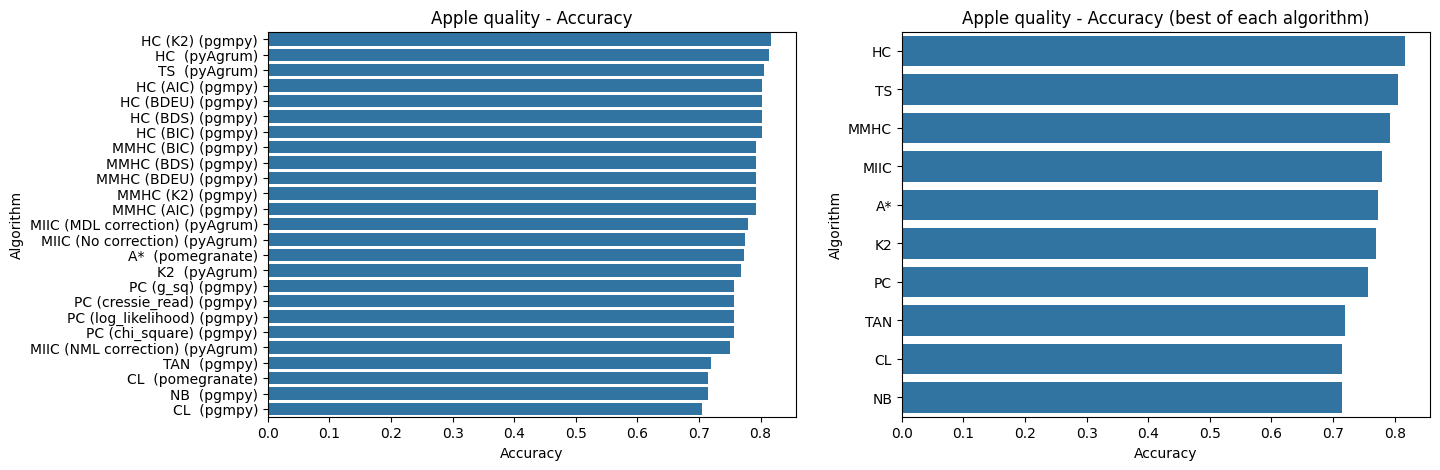

In [9]:
display(showAsDataFrame(apple_results))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracy(apple_results, "Apple quality - Accuracy", groupby_algo=False)
plt.subplot(1, 2, 2)
plotAccuracy(apple_results, "Apple quality - Accuracy (best of each algorithm)", groupby_algo=True)
plt.show()

## Accuracy vs number of edges

- A*, hill-climbing, PC, and MIIC (without correction) have the highest number of edges.
- Tree-based methods, K2, MIIC, MMHC and tabu search consistently have fewer edges.

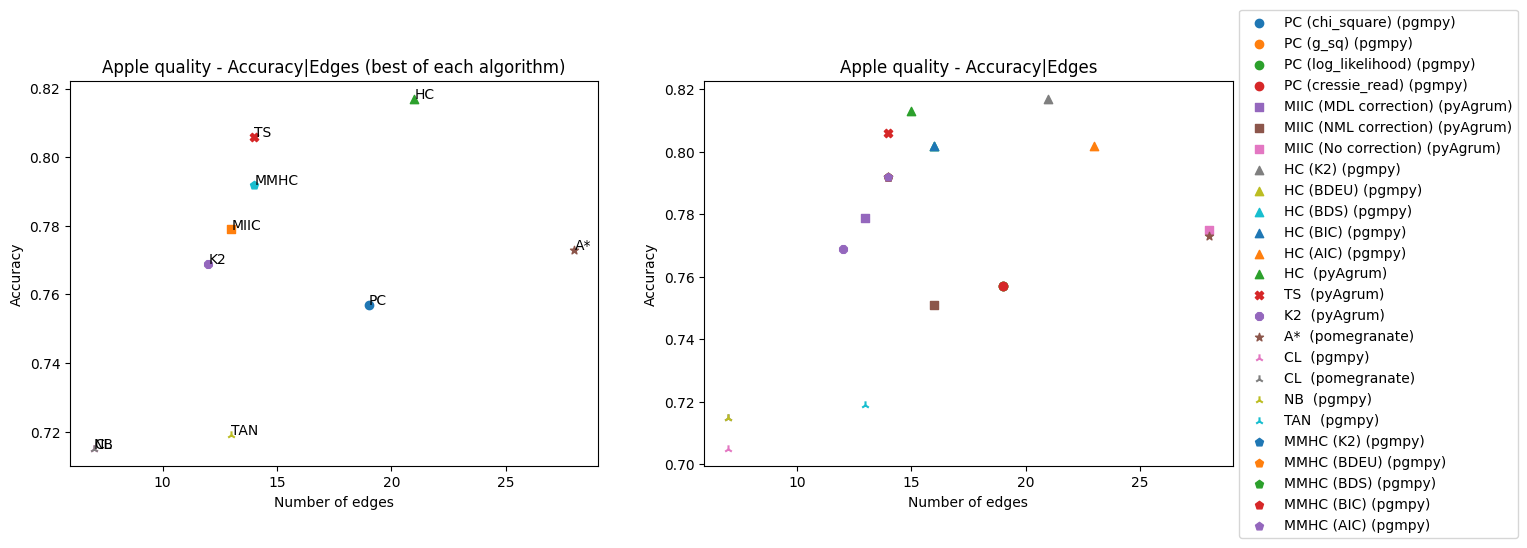

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracyEdgesScatter(apple_results, "Apple quality - Accuracy|Edges (best of each algorithm)", groupby_algo=True)
plt.subplot(1, 2, 2)
plotAccuracyEdgesScatter(apple_results, "Apple quality - Accuracy|Edges", groupby_algo=False)
plt.show()

## Accuracy vs execution time

- Max-min hill-climbing is the slowest but it must be noted that the implementation is not parallel.
- A*, Hill-climbing, and PC, which are the methods that produce the highest number of edges, are the slowest after MMHC.

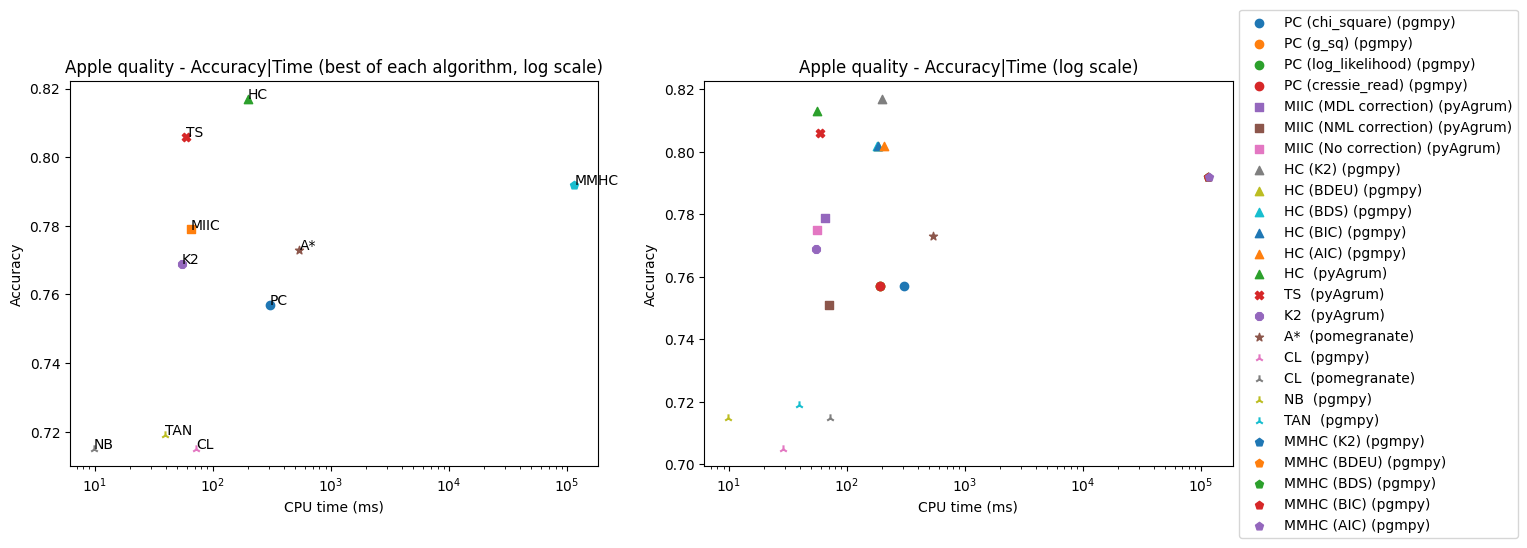

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracyTimeScatter(apple_results, "Apple quality - Accuracy|Time (best of each algorithm, log scale)", groupby_algo=True, log_scale=True)
plt.subplot(1, 2, 2)
plotAccuracyTimeScatter(apple_results, "Apple quality - Accuracy|Time (log scale)", groupby_algo=False, log_scale=True)
plt.show()

# Heart disease
---

## Accuracy

- Constraint-based algorithms achieve better results.
- PC even allows to obtain 100% accuracy.

,algorithm,category,library,notes,accuracy,f1_macro,precision_macro,recall_macro
1,PC,constraint,pgmpy,g_sq,1.000000,1.000000,1.000000,1.000000
2,PC,constraint,pgmpy,log_likelihood,1.000000,1.000000,1.000000,1.000000
7,HC,score,pgmpy,K2,0.964981,0.964844,0.968085,0.964000
6,MIIC,constraint,pyAgrum,No correction,0.961089,0.960918,0.964789,0.960000
3,PC,constraint,pgmpy,cressie_read,0.953307,0.953273,0.953273,0.953273
5,MIIC,constraint,pyAgrum,NML correction,0.953307,0.953148,0.955739,0.952424
8,HC,score,pgmpy,BDEU,0.953307,0.953102,0.956920,0.952212
14,K2,score,pyAgrum,None,0.953307,0.953051,0.958333,0.952000
0,PC,constraint,pgmpy,chi_square,0.941634,0.941546,0.942077,0.941273
11,HC,score,pgmpy,AIC,0.887160,0.887098,0.887041,0.887182


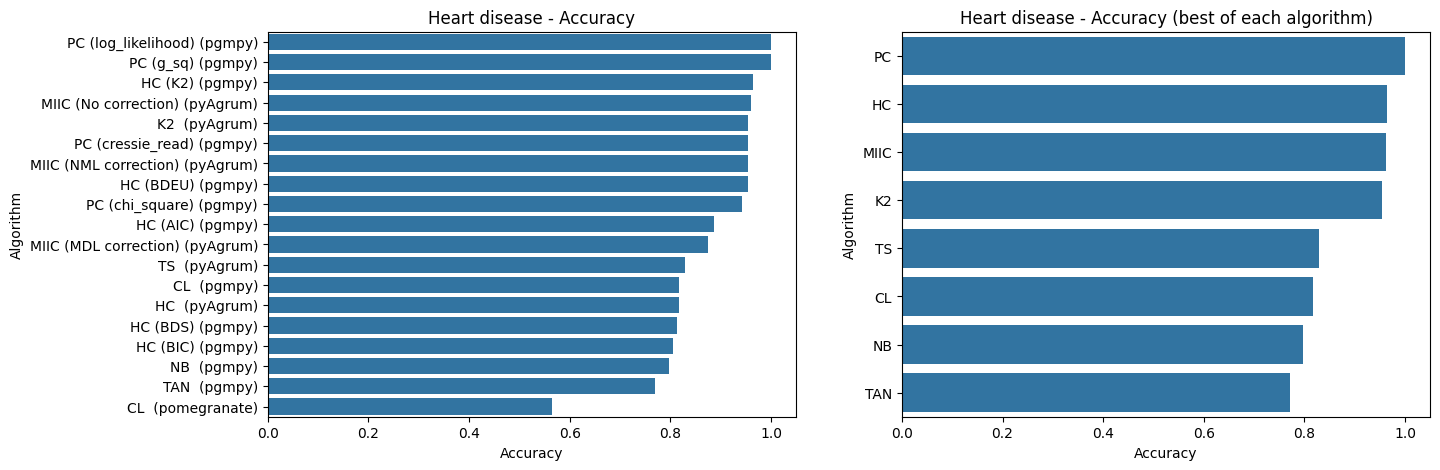

In [12]:
display(showAsDataFrame(heart_results))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracy(heart_results, "Heart disease - Accuracy", groupby_algo=False)
plt.subplot(1, 2, 2)
plotAccuracy(heart_results, "Heart disease - Accuracy (best of each algorithm)", groupby_algo=True)
plt.show()

## Accuracy vs number of edges

- MIIC (without correction) and hill-climbing (using K2 as score) are among the best performing methods but have a huge number of edges.
- The result of hill-climbing is very sensitive to the fitness function.
- The Chow-Liu algorithm of pgmpy and pomegranate produces very different results. This is caused by the selection of the root of the tree.

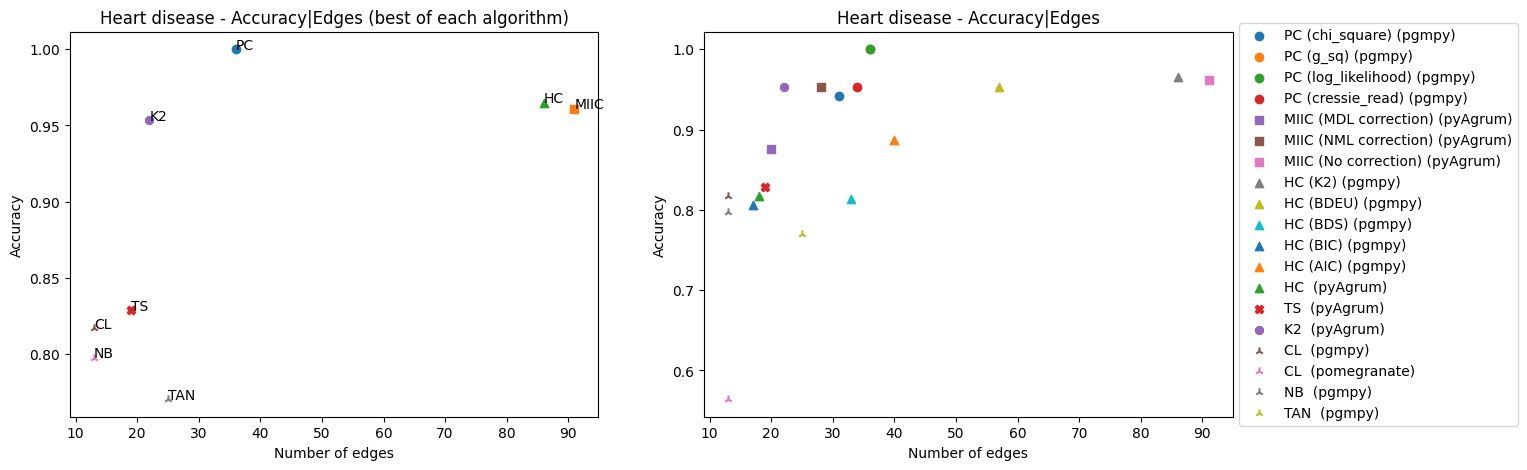

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracyEdgesScatter(heart_results, "Heart disease - Accuracy|Edges (best of each algorithm)", groupby_algo=True)
plt.subplot(1, 2, 2)
plotAccuracyEdgesScatter(heart_results, "Heart disease - Accuracy|Edges", groupby_algo=False)
plt.show()

## Accuracy vs execution time

- PC is the slowest even if the number of learned edges it not very large.
- On this dataset, the execution time of hill-climbing is sensitive to the choice of the fitness function.

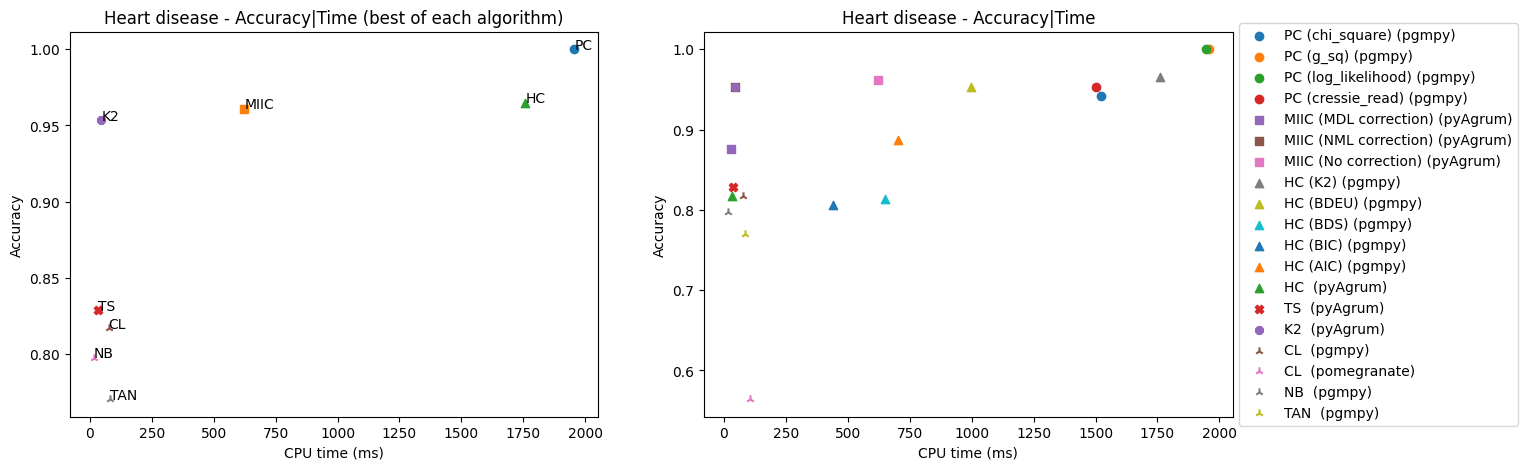

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plotAccuracyTimeScatter(heart_results, "Heart disease - Accuracy|Time (best of each algorithm)", groupby_algo=True)
plt.subplot(1, 2, 2)
plotAccuracyTimeScatter(heart_results, "Heart disease - Accuracy|Time", groupby_algo=False)
plt.show()